In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from scipy.io.wavfile import read
from matplotlib import pyplot as plt 
from roomacoustics import edc_noise_handling as nh 
from roomacoustics import test_edc_noise_handling as test_enh 
import roomacoustics as ra
%load_ext autoreload
%autoreload 2

filename = "/Volumes/Macintosh HD/Users/johannes/ITA/roomacoustics/resources/analytic_rir_psnr50_ml.bin"
with open(filename, 'rb') as f:
    test_rir = np.fromfile(f, dtype=float)
test_rir /= np.amax(np.abs(test_rir))



In [ ]:
test_enh.test_estimate_noise_energy()
test_enh.test_remove_silence_at_beginning_and_square_data()
test_enh.test_smooth_edc()
test_enh.test_substract_noise_from_edc()


In [7]:
print(nh.energy_decay_curve_truncation(test_rir, 44100))

[1.00000000e+00 9.97261419e-01 9.94821197e-01 ... 1.05790954e-06
 5.00693124e-08 4.94205466e-08]


/Users/johannes/ITA/roomacoustics/roomacoustics/edc_noise_handling.py:317: RuntimeWarning: invalid value encountered in log10
  plt.plot(time_vector, 10*np.log10(substraction))
/Users/johannes/ITA/roomacoustics/roomacoustics/edc_noise_handling.py:321: RuntimeWarning: invalid value encountered in log10
  plt.plot(time_vector[0:energy_decay_curve.shape[0]], 10*np.log10(energy_decay_curve))


array([1.        , 0.99723731, 0.99477563, ..., 0.0029788 , 0.00297806,
       0.00297833])

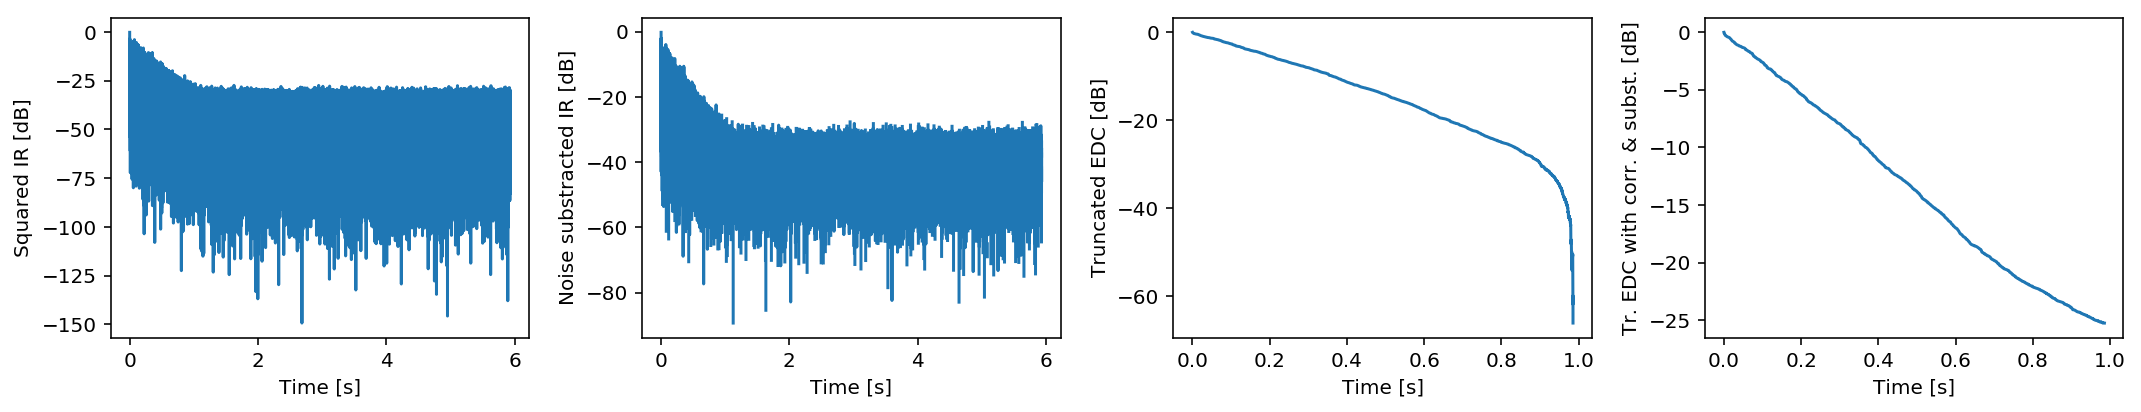

In [28]:
nh.energy_decay_curve_chu_lundeby(test_rir, 44100, freq='broadband', plot=True, is_energy=False)

/Users/johannes/ITA/roomacoustics/roomacoustics/edc_noise_handling.py:235: RuntimeWarning: invalid value encountered in log10
  plt.xlabel('Time [s]')


array([1.00000000e+00, 9.97233070e-01, 9.94767616e-01, ...,
       5.18720156e-07, 7.87792003e-07, 7.88866433e-08])

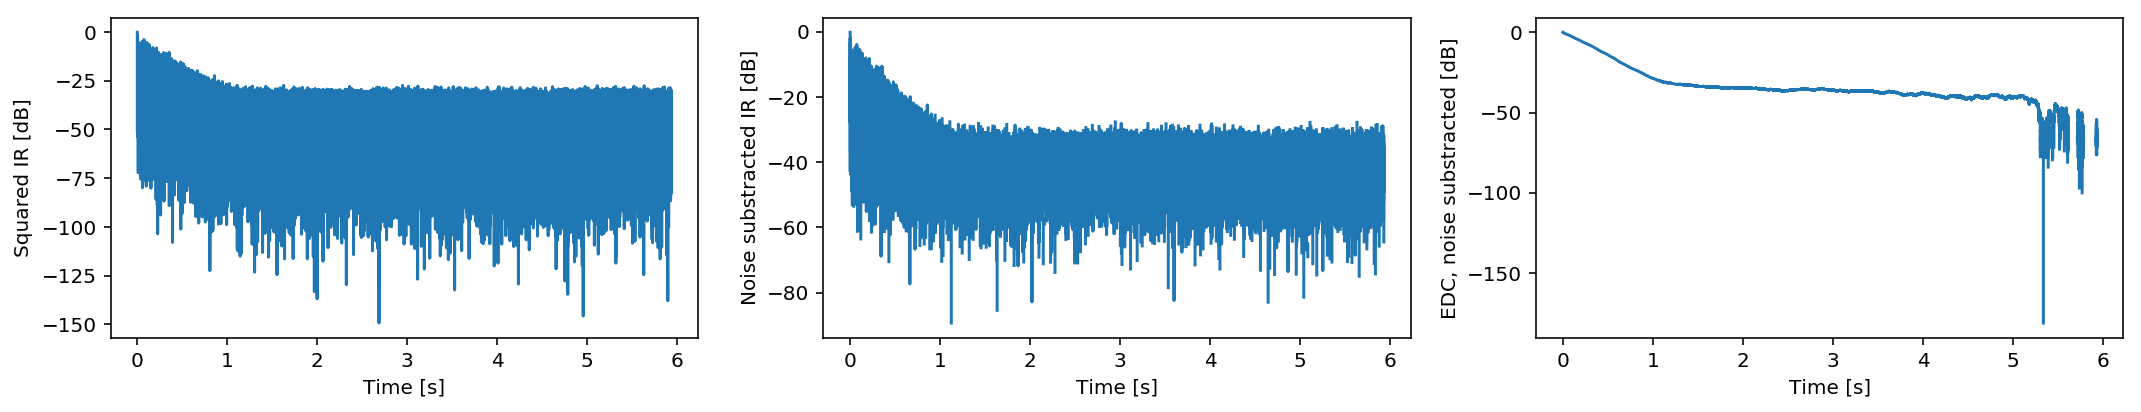

In [32]:
nh.energy_decay_curve_chu(test_rir, 44100, freq='broadband', plot=True, is_energy=False)

array([1.        , 0.99726948, 0.99483644, ..., 0.00294537, 0.00294458,
       0.00294358])

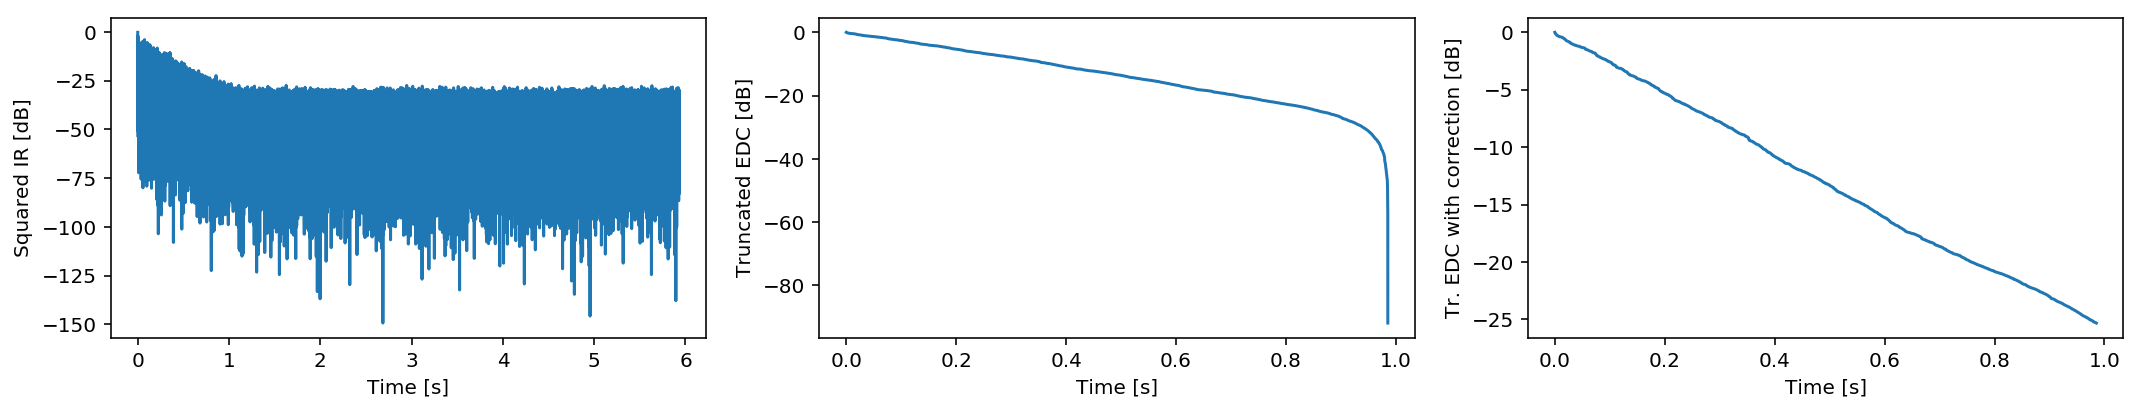

In [15]:
nh.energy_decay_curve_lundeby(test_rir, 44100, freq='broadband', plot=True, is_energy=False)

(0.9853014240554885, 2.2636648910585344, -40.173607327533134)

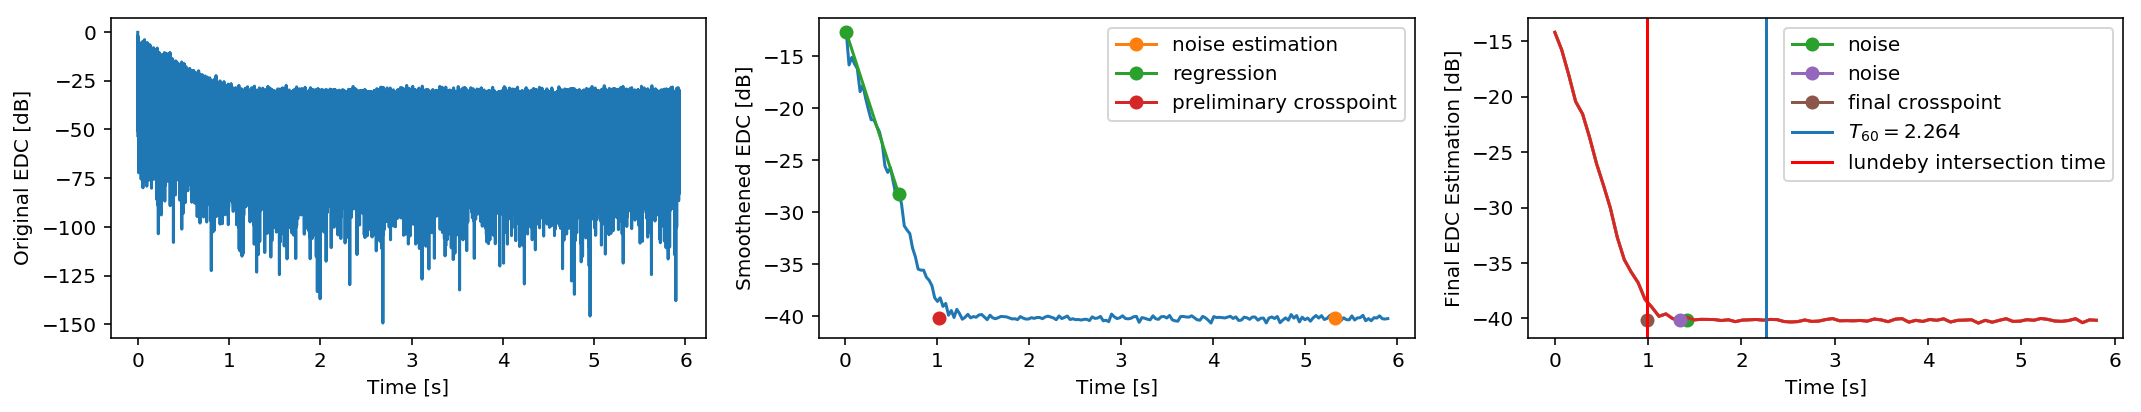

In [13]:
nh.intersection_time_lundeby(test_rir, 44100, freq='broadband', plot=True)

In [26]:
nh.energy_decay_curve_truncation(test_rir, 44100, freq='broadband')

array([1.00000000e+00, 9.97261420e-01, 9.94821197e-01, ...,
       2.19676822e-07, 2.19028057e-07, 1.69607518e-07])